### Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Load data

In [33]:
power_data = pd.read_csv("data_combined/power_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
temp_data = pd.read_csv("data_combined/temp_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
evaflow_data = pd.read_csv("data_combined/evaflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
conflow_data = pd.read_csv("data_combined/conflow_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)
zonepump_data = pd.read_csv("data_combined/zonepump_combined.csv").set_index('ts').drop('Unnamed: 0', axis=1)

In [34]:
# Filter by Chiller 1
power1 = power_data[power_data['chiller'] == 1]
temp1 = temp_data[temp_data['chiller'] == 1]
evaflow1 = evaflow_data[evaflow_data['chiller'] == 1]
conflow1 = conflow_data[conflow_data['chiller'] == 1]

power1 = power1.sort_index()
temp1 = temp1.sort_index()
evaflow1 = evaflow1.sort_index()
conflow1 = evaflow1.sort_index()
#################################

# Filter by Chiller 2
power2 = power_data[power_data['chiller'] == 2]
temp2 = temp_data[temp_data['chiller'] == 2]
evaflow2 = evaflow_data[evaflow_data['chiller'] == 2]
conflow2 = conflow_data[conflow_data['chiller'] == 2]

power2 = power2.sort_index()
temp2 = temp2.sort_index()
evaflow2 = evaflow2.sort_index()
conflow2 = evaflow2.sort_index()
#################################

# Filter by Chiller 3
power3 = power_data[power_data['chiller'] == 3]
temp3 = temp_data[temp_data['chiller'] == 3]
evaflow3 = evaflow_data[evaflow_data['chiller'] == 3]
conflow3 = conflow_data[conflow_data['chiller'] == 3]

power3 = power3.sort_index()
temp3 = temp3.sort_index()
evaflow3 = evaflow3.sort_index()
conflow3 = evaflow3.sort_index()
#################################

# Filter by Chiller 4
power4 = power_data[power_data['chiller'] == 4]
temp4 = temp_data[temp_data['chiller'] == 4]
evaflow4 = evaflow_data[evaflow_data['chiller'] == 4]
conflow4 = conflow_data[conflow_data['chiller'] == 4]

power4 = power4.sort_index()
temp4 = temp4.sort_index()
evaflow4 = evaflow4.sort_index()
conflow4 = evaflow4.sort_index()
#################################

zonepump = zonepump_data.sort_index()

### Process data to standardize index

In [35]:
def standardize_index(df):
    new_df = pd.DataFrame()
    # round down timestamps to nearest min
    new_df = df.set_index(
                pd.to_datetime(df.index).floor('min'))

    # remove instances with duplicated index
    new_df = new_df[
                [not d for d in new_df.index.duplicated()]]

    # set the index to every minute mark
    new_df = new_df.reindex(
                pd.date_range(
                    "2017-05-01 00:00:00",
                    "2017-11-30 23:59:00",
                    freq='min'))

    # forward and backward fill any newly created rows
    new_df = new_df.fillna(method='ffill')
    new_df = new_df.fillna(method='bfill')
    
    return new_df

In [36]:
def rename_df_columns(df, chiller_num):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_CH" + str(chiller_num)
    return result

def rename_conflow_columns(df):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_conflow"
    return result

def rename_evaflow_columns(df):
    result = {}
    for col in df.columns:
        result[str(col)] = str(col) + "_evaflow"
    return result

In [37]:
conflow1 = conflow1.rename(columns=rename_conflow_columns(conflow1))
conflow2 = conflow2.rename(columns=rename_conflow_columns(conflow2))
conflow3 = conflow3.rename(columns=rename_conflow_columns(conflow3))
conflow4 = conflow4.rename(columns=rename_conflow_columns(conflow4))

evaflow1 = evaflow1.rename(columns=rename_evaflow_columns(evaflow1))
evaflow2 = evaflow2.rename(columns=rename_evaflow_columns(evaflow2))
evaflow3 = evaflow3.rename(columns=rename_evaflow_columns(evaflow3))
evaflow4 = evaflow4.rename(columns=rename_evaflow_columns(evaflow4))

In [38]:
predictors_list = [power1, temp1, evaflow1, conflow1, power2, temp2, evaflow2, conflow2, power3, temp3, evaflow3, conflow3, power4, temp4, evaflow4, conflow4]

In [39]:
combined_predictors_list = []
chiller_number_list = [1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4]
for i in range(len(chiller_number_list)):
    temp_df = predictors_list[i].rename(columns=rename_df_columns(predictors_list[i], chiller_number_list[i]))
    combined_predictors_list.append(standardize_index(temp_df))

In [40]:
combined_predictors = pd.concat(combined_predictors_list, axis=1)

In [41]:
# ## KEEP THIS CELL AS TEMPLATE

# # round down timestamps to nearest min
# temp3_Aug_cleaned = temp3_Aug.set_index(
#                         pd.to_datetime(temp3_Aug.index).floor('min'))

# # remove instances with duplicated index
# temp3_Aug_cleaned = temp3_Aug_cleaned[
#                         [not d for d in temp3_Aug_cleaned.index.duplicated()]]

# # set the index to every minute mark
# temp3_Aug_cleaned = temp3_Aug_cleaned.reindex(
#                         pd.date_range(
#                             temp3_Aug_cleaned.index[0].date(),
#                             temp3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
#                             freq='min'))

# # forward and backward fill any newly created rows
# temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='ffill')
# temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='bfill')

### Load error log

In [82]:
error_Jul = pd.read_csv("data_errorlog/Equipment Error Log_2017-07-01_2017-07-31.csv")
error_Aug = pd.read_csv("data_errorlog/Equipment Error Log_2017-08-01_2017-08-31.csv")
error_Sep = pd.read_csv("data_errorlog/Equipment Error Log_2017-09-01_2017-09-30.csv")
error_Oct = pd.read_csv("data_errorlog/Equipment Error Log_2017-10-01_2017-10-31.csv")

error_Jul['Start'] = pd.to_datetime(error_Jul['Start'])
error_Jul['End'] = pd.to_datetime(error_Jul['End'])
error_Jul = error_Jul.set_index('Start')

error_Aug['Start'] = pd.to_datetime(error_Aug['Start'])
error_Aug['End'] = pd.to_datetime(error_Aug['End'])
error_Aug = error_Aug.set_index('Start')

error_Sep['Start'] = pd.to_datetime(error_Sep['Start'])
error_Sep['End'] = pd.to_datetime(error_Sep['End'])
error_Sep = error_Sep.set_index('Start')

error_Oct['Start'] = pd.to_datetime(error_Oct['Start'])
error_Oct['End'] = pd.to_datetime(error_Oct['End'])
error_Oct = error_Oct.set_index('Start')

frames = [error_Jul, error_Aug, error_Sep, error_Oct]
error_Total = pd.concat(frames)

In [83]:
error_Total.head()

,End,Equipment ID,Error Type,Status
Start,,,,
2017-07-21 14:45:10,2017-07-23 08:30:10,ch1,TRIP,Historical
2017-07-31 00:23:10,2017-07-31 11:36:10,ch1,TRIP,Historical
2017-07-31 00:23:10,2017-07-31 11:35:10,ch2,TRIP,Historical
2017-07-19 11:59:10,2017-07-20 10:41:10,ch3,TRIP,Historical
2017-07-08 05:10:10,2017-07-10 07:18:10,ch4,TRIP,Historical


### Process error log data (Inclusive of duration)

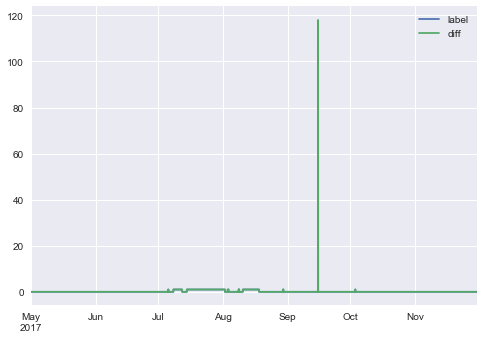

In [125]:
error_occurrence = error_Total.copy()
error_occurrence['start'] = error_occurrence.index
error_occurrence['label'] = [1 for i in range(len(error_Total))]
error_occurrence['diff'] = round((error_occurrence['End'] - error_occurrence['start']).dt.total_seconds()/60)
# round down timestamps to nearest min
error_occurrence = error_occurrence.set_index(
                        pd.to_datetime(error_Total.index).floor('min'))

# merge rows having the same timestamp, by summing their values in each column
error_occurrence = error_occurrence.groupby(by=error_occurrence.index).sum()

# expand the error occurrences to include timestamps from time t-5 to time t
expanded_Error = pd.DataFrame(columns=error_occurrence.columns)

for i in range(len(error_occurrence)):
    curr_data = error_occurrence.iloc[i]
    #print(curr_data["diff"])
    curr_timestamp = curr_data.name
    for j in range(21):
        curr_data.rename(curr_timestamp - pd.Timedelta(minutes=j), inplace=True)
        expanded_Error = expanded_Error.append(curr_data)
        #print(expanded_Error)
    for k in range(np.asscalar(np.int16(curr_data["diff"]))):
        curr_data.rename(curr_timestamp + pd.Timedelta(minutes=k), inplace=True)
        expanded_Error = expanded_Error.append(curr_data)
    #print(expanded_Error)
        
# merge rows having the same timestamp, by summing their values in each column
expanded_Error = expanded_Error.groupby(by=expanded_Error.index).sum()

# convert label value to 1 if it is >1
expanded_Error

# set index to every minute mark
expanded_Error = expanded_Error.reindex(
                    pd.date_range(
                        "2017-05-01 00:00:00",
                        "2017-11-30 23:59:00",
                        freq='min'))

# fill any newly created rows with 0
expanded_Error = expanded_Error.fillna(value = 0)

# convert label value to 1 if it is >1
expanded_Error[expanded_Error['label'] > 1] = 1

_ = expanded_Error.plot()

In [90]:
#original
"""error_occurrence = pd.DataFrame()
error_occurrence['label'] = [1 for i in range(len(error_Total))]

# round down timestamps to nearest min
error_occurrence = error_occurrence.set_index(
                        pd.to_datetime(error_Total.index).floor('min'))

# merge rows having the same timestamp, by summing their values in each column
error_occurrence = error_occurrence.groupby(by=error_occurrence.index).sum()
print(error_occurrence)

# expand the error occurrences to include timestamps from time t-5 to time t
expanded_Error = pd.DataFrame(columns=error_occurrence.columns)

for i in range(len(error_occurrence)):
    curr_data = error_occurrence.iloc[i]
    curr_timestamp = curr_data.name
    #curr_end=curr_data
    for j in range(21):
        curr_data.rename(curr_timestamp - pd.Timedelta(minutes=j), inplace=True)
        expanded_Error = expanded_Error.append(curr_data)
        print(expanded_Error)
        
# merge rows having the same timestamp, by summing their values in each column
expanded_Error = expanded_Error.groupby(by=expanded_Error.index).sum()

# convert label value to 1 if it is >1
expanded_Error

# set index to every minute mark
expanded_Error = expanded_Error.reindex(
                    pd.date_range(
                        "2017-05-01 00:00:00",
                        "2017-11-30 23:59:00",
                        freq='min'))

# fill any newly created rows with 0
expanded_Error = expanded_Error.fillna(value = 0)

# convert label value to 1 if it is >1
expanded_Error[expanded_Error['label'] > 1] = 1

_ = expanded_Error.plot() """

AttributeError: 'DataFrame' object has no attribute 'type'

### Compile shortlisted data features into one dataframe

In [126]:
feature_list = ['ch1Watt', 'ch2Watt', 'ch3Watt', 'totalPositiveWattHour', 'flowRate_conflow', 'flowSpeed_conflow', 'totalFlowRate_conflow', 'flowRate_evaflow', 'flowSpeed_evaflow', 'totalFlowRate_evaflow','ain1','ain2','ain3','ain4','ain5','voltage1','voltage2','voltage3','voltage4','voltage5', 'value1', 'value2', 'value3', 'value4']
feature_cols = []
for i in range(1,5):
    for feature in feature_list:
        temp = feature + '_CH' + str(i)
        feature_cols.append(temp)

In [127]:
shortlisted_features = pd.DataFrame()
for feature_col in feature_cols:
    shortlisted_features[feature_col] = combined_predictors[feature_col]

In [128]:
shortlisted_features.describe()


,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,totalFlowRate_evaflow_CH1,...,ain5_CH4,voltage1_CH4,voltage2_CH4,voltage3_CH4,voltage4_CH4,voltage5_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
count,308160.000000,308160.000000,308160.000000,3.081600e+05,308160.000000,308160.000000,3.081600e+05,308160.000000,308160.000000,3.081600e+05,...,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000
mean,8353.854819,7395.664272,8021.736364,1.031261e+08,38.477928,0.573227,2.319847e+05,38.477928,0.573227,2.319847e+05,...,2292.647274,1.088772,1.211091,1.770844,1.729546,0.230888,11.342335,14.578588,29.358023,28.270030
std,19811.612876,18470.917516,19083.645799,4.006951e+07,80.834707,1.204240,5.019886e+06,80.834707,1.204240,5.019886e+06,...,2.849671,0.133601,0.212033,0.144067,0.131842,0.000287,3.553082,5.634212,3.644717,3.365827
min,0.000000,0.000000,197.000000,2.754520e+07,0.000000,0.000000,-2.130685e+09,0.000000,0.000000,-2.130685e+09,...,2284.000000,0.675952,0.915637,0.000403,1.257239,0.230017,0.000000,0.000000,0.000000,15.835876
25%,341.000000,0.000000,350.000000,5.695980e+07,0.000000,0.000000,1.726880e+05,0.000000,0.000000,1.726880e+05,...,2292.000000,0.980896,1.054614,1.702771,1.664502,0.230823,8.487243,10.463258,27.649230,26.634521
50%,346.000000,0.000000,357.000000,1.143161e+08,0.000000,0.000000,2.652020e+05,0.000000,0.000000,2.652020e+05,...,2292.000000,1.030847,1.119873,1.780920,1.741846,0.230823,9.736938,12.118837,29.710694,28.578493
75%,352.000000,0.000000,367.000000,1.417324e+08,14.073864,0.209666,3.036680e+05,14.073864,0.209666,3.036680e+05,...,2296.000000,1.216553,1.364392,1.861487,1.824023,0.231226,14.757080,18.677062,31.782838,30.821535
max,78261.000000,74204.000000,76009.000000,1.465022e+08,233.577560,3.479735,3.188530e+05,233.577560,3.479735,3.188530e+05,...,2348.000000,3.299597,3.299597,3.299597,2.172473,0.236462,69.989324,69.989324,49.992374,36.856383


In [47]:
# takes in a dataframe and performs windowing
# returns a dataframe with the newly created columns (i.e. windows)
## def perform_windowing(input_df, window_size = 20, horizon =1):
##    output_col_names = []
##    for dayNum in range(window_size):
##        for col_name in input_df.columns:
##            output_col_names.append(col_name + "_" + str(dayNum))
##    output_df = pd.DataFrame(columns=output_col_names)
##    for window_idx in range(window_size):
##        for col_idx in range(len(input_df.columns)):
##            output_df[str(input_df.columns[col_idx]) + "_" + str(window_idx)] = \
##            input_df[str(input_df.columns[col_idx])].shift(window_idx+horizon)
##    return output_df[window_size-1:] ***/

In [48]:
#window_size = 20
#horizon = 30
#dataWindow = perform_windowing(shortlisted_features, window_size, horizon)
#dataWindow = dataWindow.dropna()
#dataWindowVal = dataWindow.values

##from sklearn import preprocessing #originally from the cell below
#dataWindowNorm = preprocessing.normalize(dataWindowVal, axis = 0) # along features
#dataWindowNorm = pd.DataFrame(dataWindowNorm, columns=dataWindow.columns, index=dataWindow.index)

#frames = [bin_Aug_Error[window_size-1:], dataWindowNorm]
#AugDataWindowDropNorm = pd.concat(frames, axis = 1, join_axes=[dataWindowNorm.index])

#AugDataWindowDropNorm.describe()

In [49]:
#from sklearn import preprocessing
#dataWindowNorm = preprocessing.normalize(dataWindowVal, axis = 0) # along features
#dataWindowNorm = pd.DataFrame(dataWindowNorm, columns=dataWindow.columns, index=dataWindow.index)

In [129]:
dataWindow = shortlisted_features.dropna()
dataWindowVal = dataWindow.values

from sklearn import preprocessing #originally from the cell below
dataWindowNorm = preprocessing.normalize(dataWindowVal, axis = 0) # along features
dataWindowNorm = pd.DataFrame(dataWindowNorm, columns=dataWindow.columns, index=dataWindow.index)

In [130]:
# Combine label with shortlisted features
data = pd.concat([dataWindowNorm, expanded_Error], axis=1)
data.describe()

,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,totalFlowRate_evaflow_CH1,...,voltage2_CH4,voltage3_CH4,voltage4_CH4,voltage5_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4,label,diff
count,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,...,308160.000000,3.081600e+05,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000
mean,0.000700,0.000670,0.000698,0.001679,0.000774,0.000774,0.000083,0.000774,0.000774,0.000083,...,0.001774,1.795475e-03,0.001796,0.001801,0.001719,0.001680,0.001788,0.001789,0.147148,0.199163
std,0.001660,0.001672,0.001661,0.000652,0.001627,0.001627,0.001799,0.001627,0.001627,0.001799,...,0.000311,1.460711e-04,0.000137,0.000002,0.000539,0.000649,0.000222,0.000213,0.354254,2.509444
min,0.000000,0.000000,0.000017,0.000448,0.000000,0.000000,-0.763791,0.000000,0.000000,-0.763791,...,0.001342,4.084352e-07,0.001306,0.001795,0.000000,0.000000,0.000000,0.001002,0.000000,0.000000
25%,0.000029,0.000000,0.000030,0.000927,0.000000,0.000000,0.000062,0.000000,0.000000,0.000062,...,0.001545,1.726456e-03,0.001729,0.001801,0.001286,0.001206,0.001684,0.001685,0.000000,0.000000
50%,0.000029,0.000000,0.000031,0.001861,0.000000,0.000000,0.000095,0.000000,0.000000,0.000095,...,0.001641,1.805692e-03,0.001809,0.001801,0.001476,0.001397,0.001809,0.001808,0.000000,0.000000
75%,0.000029,0.000000,0.000032,0.002308,0.000283,0.000283,0.000109,0.000283,0.000283,0.000109,...,0.001999,1.887379e-03,0.001894,0.001804,0.002237,0.002153,0.001935,0.001950,0.000000,0.000000
max,0.006557,0.006718,0.006614,0.002385,0.004700,0.004700,0.000114,0.004700,0.004700,0.000114,...,0.004834,3.345493e-03,0.002256,0.001845,0.010608,0.008067,0.003044,0.002332,1.000000,118.000000


### Calculate Heat Capacity Rate (kW)

In [52]:
# # water density obtained according to example in slides (units: kg/cubicmetre)
# # evaflow converted from litre-per-min to cubicmetre-per-hr
# hcr = \
# (999.68844162593 \
# * shortlisted_features['evaflow_totalFlowRate'] * 0.06 \
# * 4.19 \
# * (shortlisted_features['chilled_return'] - shortlisted_features['chilled_supply'])) \
# / 3600

# shortlisted_features['hcr'] = hcr

# hcr.describe()

### Calculate Coefficient of Performance (kW)

In [53]:
# cop = hcr/(shortlisted_features['pm_totalPositiveWattHour']/1000)

# shortlisted_features['cop'] = cop

# cop.describe()

### Normalize data

In [54]:
# hcr_norm = (shortlisted_features['hcr'] - shortlisted_features['hcr'].mean()) / shortlisted_features['hcr'].std()
# cop_norm = (shortlisted_features['cop'] - shortlisted_features['cop'].mean()) / shortlisted_features['cop'].std()
# pm_norm = (shortlisted_features['pm_totalPositiveWattHour'] - shortlisted_features['pm_totalPositiveWattHour'].mean()) / shortlisted_features['pm_totalPositiveWattHour'].std()
# chs_norm = (shortlisted_features['chilled_supply'] - shortlisted_features['chilled_supply'].mean()) / shortlisted_features['chilled_supply'].std()
# chr_norm = (shortlisted_features['chilled_return'] - shortlisted_features['chilled_return'].mean()) / shortlisted_features['chilled_return'].std()

In [55]:
# error3_Aug_occ = list(bin_Aug_Error[list(bin_Aug_Error.sum(axis=1) > 0)].index)

### Plot the graphs

In [56]:
# pd.DataFrame(data={'hcr_norm': hcr_norm,
#                    'cop_norm': cop_norm,
#                    'pm_norm': pm_norm,
#                    'chs_norm': chs_norm,
#                    'chr_norm': chr_norm,}).plot(figsize=[50,20])

# for ts in error3_Aug_occ:
#     plt.axvline(ts, color='purple') # vertical lines in purple indicate error occurence(s)
    
# plt.legend(prop={'size': 40})
# plt.show()

### Zoomed in version of graph above

In [57]:
# pd.DataFrame(data={'hcr_norm': hcr_norm[10500:11500],
#                    'cop_norm': cop_norm[10500:11500],
#                    'pm_norm': pm_norm[10500:11500],
#                    'chs_norm': chs_norm[10500:11500],
#                    'chr_norm': chr_norm[10500:11500]}).plot(figsize=[50,20])

# for ts in list(error3_Aug_occ):
#     plt.axvline(ts, color='purple')
    
# plt.legend(prop={'size': 40})
# plt.show()

### Over-sampling to balance classification (using SMOTE)

In [58]:
#http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html#smote-adasyn
#from imblearn.over_sampling import SMOTE

# Building the AutoEncoder

In [60]:
#!pip install tflearn

#from __future__ import division, print_function, absolute_import
#import tflearn
#from tflearn.layers.core import input_data, dropout, fully_connected
#from tflearn.layers.conv import conv_2d, max_pool_2d
#from tflearn.layers.normalization import batch_normalization, local_response_normalization
#from tflearn.layers.bin_Aug_
#import numpy as np
#import pandas as pd

#from sklearn import preprocessing

#from sklearn.decomposition import PCA

#from scipy.stats import skew
#from scipy.stats.stats import pearsonr

#from sklearn.model_selection import train_test_split

In [61]:
#total_error = bin_Aug_Error[window_size-1:]
#total_error.head()

NameError: name 'bin_Aug_Error' is not defined

In [62]:
def binary_maker(series):
    for i in range(len(series)):
        if(series[i] != 0):
            series[i] = 1
    return series

In [133]:
combined_label_data = pd.DataFrame()
combined_label_data['label_0'] = expanded_Error.sum(axis = 1) #originally total_error
combined_label_data['label_0']
y = binary_maker(combined_label_data['label_0'])
combined_label_data['error?'] = y

frames = [combined_label_data['error?'], dataWindowNorm]
data = pd.concat(frames, axis = 1, join_axes=[dataWindowNorm.index])

In [64]:
# Check whether Errors are properly transfered
# AugDataWindowDropNorm['COMPRESSOR 1 STATUS REVERT'].nonzero()
#AugDataWindowDropNorm = AugDataWindowDropNorm.dropna()

In [134]:
#AugDataWindowDropNorm.head()
data.head()

,error?,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,...,ain5_CH4,voltage1_CH4,voltage2_CH4,voltage3_CH4,voltage4_CH4,voltage5_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
2017-05-01 00:00:00,0.0,0.000029,0.000000,0.000031,0.000448,0.000000,0.000000,0.000045,0.000000,0.000000,...,0.001798,0.002206,0.002124,0.001566,0.001606,0.001798,0.002745,0.002412,0.001428,0.001487
2017-05-01 00:01:00,0.0,0.000032,0.000000,0.000034,0.000448,0.000000,0.000000,0.000045,0.000000,0.000000,...,0.001798,0.002206,0.002119,0.001567,0.001606,0.001798,0.002747,0.002404,0.001430,0.001487
2017-05-01 00:02:00,0.0,0.000032,0.000000,0.000034,0.000448,0.000000,0.000000,0.000045,0.000000,0.000000,...,0.001798,0.002204,0.002122,0.001561,0.001604,0.001798,0.002740,0.002409,0.001421,0.001485
2017-05-01 00:03:00,0.0,0.000033,0.000000,0.000036,0.000448,0.000218,0.000218,0.000045,0.000218,0.000218,...,0.001798,0.002208,0.002124,0.001566,0.001606,0.001798,0.002751,0.002414,0.001428,0.001487
2017-05-01 00:04:00,0.0,0.000482,0.000406,0.000430,0.000448,0.001551,0.001551,0.000045,0.001551,0.001551,...,0.001798,0.002202,0.002121,0.001563,0.001604,0.001798,0.002737,0.002406,0.001423,0.001485


In [66]:
train_set = AugDataWindowDropNorm[:int(len(AugDataWindowDropNorm)*0.6)]
test_set = AugDataWindowDropNorm[len(train_set):]

In [67]:
# conduct undersampling of 1:1 error to non-error ratio
errorRows = train_set[list(train_set['error?'] > 0)]
nonErrorRows = train_set[list(train_set['error?'] == 0)]
nonErrorRowsSampled = nonErrorRows.sample(n = len(errorRows))
final_sampled_data = pd.concat([errorRows, nonErrorRowsSampled])
final_sampled_data = final_sampled_data.sort_index()
final_sampled_data #refers to sampled data to use for training the NN

,error?,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,...,flowRate_conflow_CH4,flowSpeed_conflow_CH4,totalFlowRate_conflow_CH4,flowRate_evaflow_CH4,flowSpeed_evaflow_CH4,totalFlowRate_evaflow_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
2017-05-01 08:38:00,0.0,0.001571,0.001278,0.001410,0.000457,0.004541,0.004541,0.000045,0.004541,0.004541,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002441,0.002453,0.001403,0.001459
2017-05-01 18:14:00,0.0,0.001850,0.001582,0.001664,0.000467,0.004555,0.004555,0.000046,0.004555,0.004555,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002526,0.002619,0.001645,0.001703
2017-05-01 19:01:00,0.0,0.002648,0.002517,0.002428,0.000468,0.004557,0.004557,0.000046,0.004557,0.004557,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002554,0.002630,0.001647,0.001692
2017-05-02 05:24:00,0.0,0.002379,0.002212,0.002264,0.000477,0.004544,0.004544,0.000047,0.004544,0.004544,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002530,0.002700,0.001569,0.001633
2017-05-02 12:39:00,0.0,0.005620,0.005755,0.005638,0.000493,0.004547,0.004547,0.000048,0.004547,0.004547,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002538,0.002784,0.001658,0.001713
2017-05-02 13:40:00,0.0,0.005752,0.005917,0.005754,0.000496,0.004544,0.004544,0.000048,0.004544,0.004544,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002528,0.002805,0.001686,0.001748
2017-05-02 14:01:00,0.0,0.005697,0.005831,0.005784,0.000497,0.004538,0.004538,0.000048,0.004538,0.004538,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002481,0.002806,0.001695,0.001755
2017-05-02 23:23:00,0.0,0.003936,0.003880,0.003886,0.000522,0.004554,0.004554,0.000049,0.004554,0.004554,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002547,0.002886,0.001695,0.001755
2017-05-03 09:03:00,0.0,0.005961,0.006219,0.006032,0.000535,0.004540,0.004540,0.000049,0.004540,0.004540,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002601,0.002915,0.001641,0.001712
2017-05-03 11:24:00,0.0,0.006112,0.006325,0.006242,0.000543,0.004531,0.004531,0.000050,0.004531,0.004531,...,0.002195,0.002195,0.001054,0.002195,0.002195,0.001054,0.002593,0.002942,0.001701,0.001752


In [68]:
import numpy as np
train_set = final_sampled_data[:final_sampled_data.shape[0]] 
#the above basically returns the entire AugData because shape is the full dimension 
train_set = np.array(train_set)
train_set

array([[  0.00000000e+00,   1.57110159e-03,   1.27750568e-03, ...,
          2.45305122e-03,   1.40265715e-03,   1.45887930e-03],
       [  0.00000000e+00,   1.84959678e-03,   1.58171681e-03, ...,
          2.61924712e-03,   1.64460665e-03,   1.70285957e-03],
       [  0.00000000e+00,   2.64771504e-03,   2.51671335e-03, ...,
          2.63032691e-03,   1.64720830e-03,   1.69204589e-03],
       ..., 
       [  0.00000000e+00,   2.85700535e-05,   0.00000000e+00, ...,
          1.27983155e-03,   1.89436110e-03,   1.83667680e-03],
       [  0.00000000e+00,   2.84862703e-05,   0.00000000e+00, ...,
          1.02869101e-03,   1.76493104e-03,   1.72651415e-03],
       [  0.00000000e+00,   2.91565355e-05,   0.00000000e+00, ...,
          1.05823702e-03,   1.77338635e-03,   1.72718996e-03]])

# Normal Period Sampling

In [135]:
data.describe()

,error?,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,...,ain5_CH4,voltage1_CH4,voltage2_CH4,voltage3_CH4,voltage4_CH4,voltage5_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
count,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,...,308160.000000,308160.000000,308160.000000,3.081600e+05,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000
mean,0.147148,0.000700,0.000670,0.000698,0.001679,0.000774,0.000774,0.000083,0.000774,0.000774,...,0.001801,0.001788,0.001774,1.795475e-03,0.001796,0.001801,0.001719,0.001680,0.001788,0.001789
std,0.354254,0.001660,0.001672,0.001661,0.000652,0.001627,0.001627,0.001799,0.001627,0.001627,...,0.000002,0.000219,0.000311,1.460711e-04,0.000137,0.000002,0.000539,0.000649,0.000222,0.000213
min,0.000000,0.000000,0.000000,0.000017,0.000448,0.000000,0.000000,-0.763791,0.000000,0.000000,...,0.001795,0.001110,0.001342,4.084352e-07,0.001306,0.001795,0.000000,0.000000,0.000000,0.001002
25%,0.000000,0.000029,0.000000,0.000030,0.000927,0.000000,0.000000,0.000062,0.000000,0.000000,...,0.001801,0.001611,0.001545,1.726456e-03,0.001729,0.001801,0.001286,0.001206,0.001684,0.001685
50%,0.000000,0.000029,0.000000,0.000031,0.001861,0.000000,0.000000,0.000095,0.000000,0.000000,...,0.001801,0.001693,0.001641,1.805692e-03,0.001809,0.001801,0.001476,0.001397,0.001809,0.001808
75%,0.000000,0.000029,0.000000,0.000032,0.002308,0.000283,0.000283,0.000109,0.000283,0.000283,...,0.001804,0.001998,0.001999,1.887379e-03,0.001894,0.001804,0.002237,0.002153,0.001935,0.001950
max,1.000000,0.006557,0.006718,0.006614,0.002385,0.004700,0.004700,0.000114,0.004700,0.004700,...,0.001845,0.005419,0.004834,3.345493e-03,0.002256,0.001845,0.010608,0.008067,0.003044,0.002332


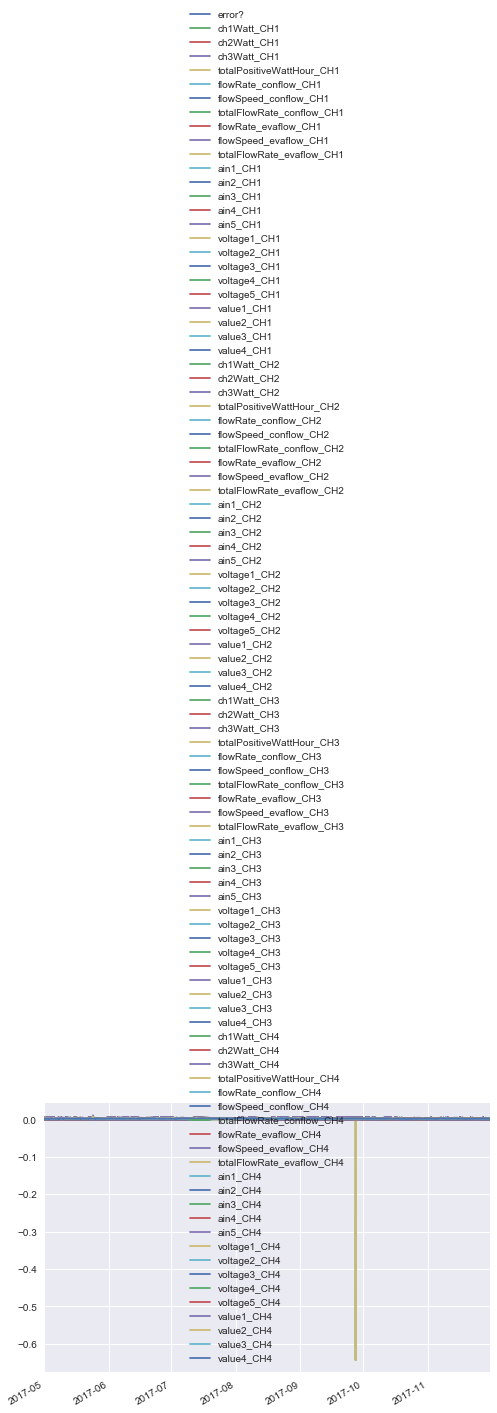

In [138]:
NPeriod = data[data["error?"] ==0]
_ = NPeriod.plot()

In [150]:
NPeriod.drop(['error?'], axis = 1, inplace = True)
NPeriodTemp = NPeriod.copy()
flist = len(feature_list)
NPeriodTemp1 = NPeriodTemp.iloc[:,0:int(flist/4)]
NPeriodTemp2 = NPeriodTemp.iloc[:,int(flist/4):int(flist/2)]
NPeriodTemp3 = NPeriodTemp.iloc[:,int(flist/2):int(3*flist/4)]
NPeriodTemp4 = NPeriodTemp.iloc[:,int(3*flist/4):]
#NPeriodTemp1 = df.drop(df.columns[[1, 69]], axis=1, inplace=True)
#NPeriodTemp = df.drop(df.columns[[1, 69]], axis=1, inplace=True)


C:\Users\ng-ka\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


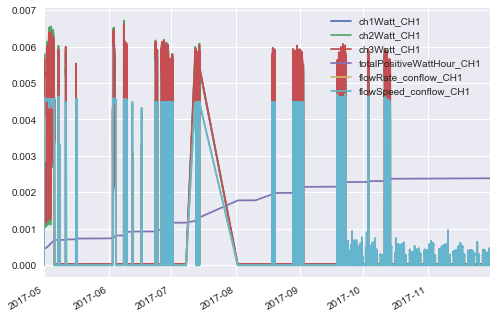

In [143]:
_1 = NPeriodTemp1.plot()

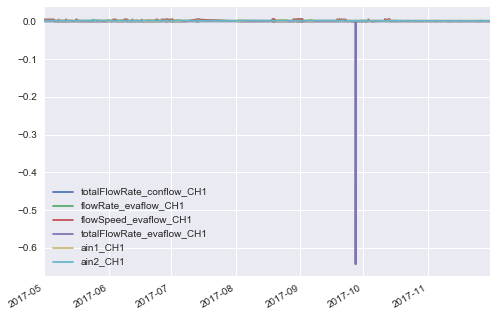

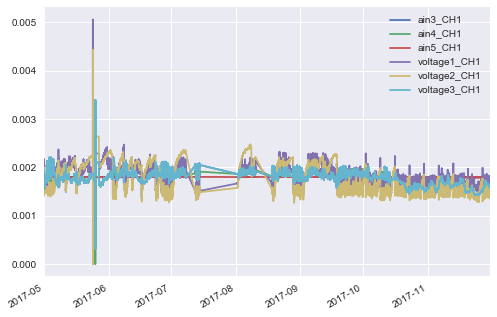

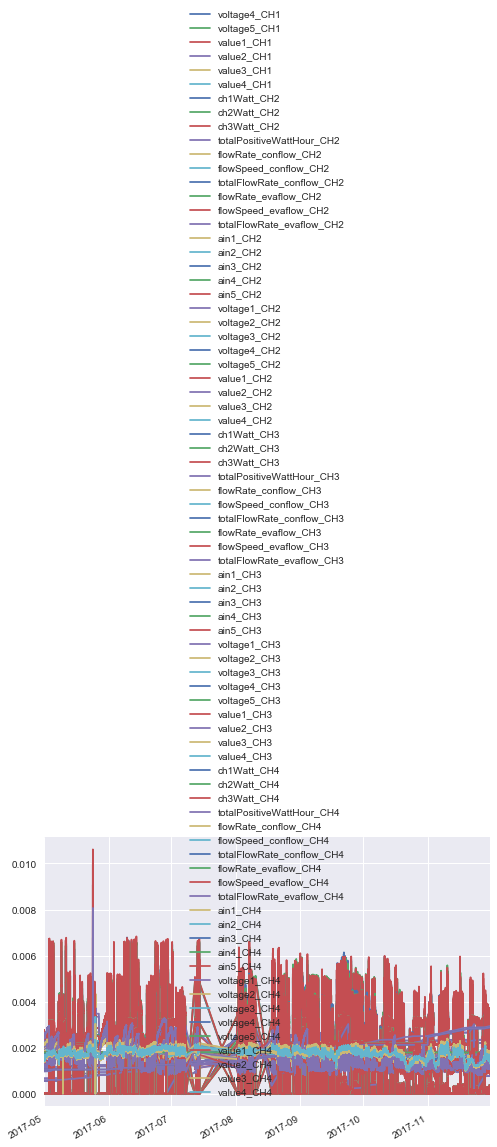

In [144]:
_12 = NPeriodTemp2.plot()
_13 = NPeriodTemp3.plot()
_14 = NPeriodTemp4.plot()

In [74]:
N2Period = AugDataWindowDropNorm[AugDataWindowDropNorm["error?"] !=0]
N2Period.head()

,error?,ch1Watt_CH1,ch2Watt_CH1,ch3Watt_CH1,totalPositiveWattHour_CH1,flowRate_conflow_CH1,flowSpeed_conflow_CH1,totalFlowRate_conflow_CH1,flowRate_evaflow_CH1,flowSpeed_evaflow_CH1,...,flowRate_conflow_CH4,flowSpeed_conflow_CH4,totalFlowRate_conflow_CH4,flowRate_evaflow_CH4,flowSpeed_evaflow_CH4,totalFlowRate_evaflow_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
2017-07-05 18:32:00,1.0,0.000029,0.0,0.000032,0.001167,0.0,0.0,0.000069,0.0,0.0,...,0.002156,0.002156,0.001311,0.002156,0.002156,0.001311,0.001426,0.001335,0.001994,0.001943
2017-07-05 18:33:00,1.0,0.000029,0.0,0.000032,0.001167,0.0,0.0,0.000069,0.0,0.0,...,0.002154,0.002154,0.001311,0.002154,0.002154,0.001311,0.001438,0.001339,0.001991,0.001945
2017-07-05 18:34:00,1.0,0.000029,0.0,0.000032,0.001167,0.0,0.0,0.000069,0.0,0.0,...,0.002155,0.002155,0.001311,0.002155,0.002155,0.001311,0.001429,0.001338,0.001983,0.001945
2017-07-05 18:35:00,1.0,0.000029,0.0,0.000032,0.001167,0.0,0.0,0.000069,0.0,0.0,...,0.002156,0.002156,0.001311,0.002156,0.002156,0.001311,0.001443,0.001348,0.001989,0.001937
2017-07-05 18:36:00,1.0,0.000029,0.0,0.000032,0.001167,0.0,0.0,0.000069,0.0,0.0,...,0.002156,0.002156,0.001311,0.002156,0.002156,0.001311,0.001460,0.001345,0.001984,0.001937


# Repeat procedure with only temperature variables

In [145]:
feature_list =['ain1','ain2','ain3','ain4','ain5','voltage1','voltage2','voltage3','voltage4','voltage5', 'value1', 'value2', 'value3', 'value4']
feature_cols = []
for i in range(1,5):
    for feature in feature_list:
        temp = feature + '_CH' + str(i)
        feature_cols.append(temp)
shortlisted_features = pd.DataFrame()
for feature_col in feature_cols:
    shortlisted_features[feature_col] = combined_predictors[feature_col]
shortlisted_features.describe()

,ain1_CH1,ain2_CH1,ain3_CH1,ain4_CH1,ain5_CH1,voltage1_CH1,voltage2_CH1,voltage3_CH1,voltage4_CH1,voltage5_CH1,...,ain5_CH4,voltage1_CH4,voltage2_CH4,voltage3_CH4,voltage4_CH4,voltage5_CH4,value1_CH4,value2_CH4,value3_CH4,value4_CH4
count,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,...,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000,308160.000000
mean,11592.985852,13097.642887,17349.084683,17319.555049,2248.205737,1.167507,1.319038,1.747192,1.744218,0.226412,...,2292.647274,1.088772,1.211091,1.770844,1.729546,0.230888,11.342335,14.578588,29.358023,28.270030
std,1299.039191,2405.986416,1337.111625,1215.861850,2.684706,0.130824,0.242302,0.134658,0.122447,0.000270,...,2.849671,0.133601,0.212033,0.144067,0.131842,0.000287,3.553082,5.634212,3.644717,3.365827
min,0.000000,0.000000,3020.000000,0.000000,2240.000000,0.000000,0.000000,0.304138,0.000000,0.225586,...,2284.000000,0.675952,0.915637,0.000403,1.257239,0.230017,0.000000,0.000000,0.000000,15.835876
25%,10652.000000,10984.000000,16568.000000,16516.000000,2248.000000,1.072742,1.106177,1.668530,1.663293,0.226392,...,2292.000000,0.980896,1.054614,1.702771,1.664502,0.230823,8.487243,10.463258,27.649230,26.634521
50%,11372.000000,12268.000000,17436.000000,17484.000000,2248.000000,1.145252,1.235486,1.755945,1.760779,0.226392,...,2292.000000,1.030847,1.119873,1.780920,1.741846,0.230823,9.736938,12.118837,29.710694,28.578493
75%,12696.000000,15264.000000,18192.000000,18204.000000,2248.000000,1.278589,1.537207,1.832080,1.833289,0.226392,...,2296.000000,1.216553,1.364392,1.861487,1.824023,0.231226,14.757080,18.677062,31.782838,30.821535
max,32764.000000,32764.000000,32764.000000,21080.000000,2268.000000,3.299597,3.299597,3.299597,2.122925,0.228406,...,2348.000000,3.299597,3.299597,3.299597,2.172473,0.236462,69.989324,69.989324,49.992374,36.856383


In [146]:
dataWindow = shortlisted_features.dropna()
dataWindowVal = dataWindow.values

from sklearn import preprocessing #originally from the cell below
dataWindowNorm = preprocessing.normalize(dataWindowVal, axis = 0) # along features
dataWindowNorm = pd.DataFrame(dataWindowNorm, columns=dataWindow.columns, index=dataWindow.index)
data = pd.concat([dataWindowNorm, expanded_Error], axis=1)

In [147]:
combined_label_data = pd.DataFrame()
combined_label_data['label_0'] = expanded_Error.sum(axis = 1) #originally total_error
combined_label_data['label_0']
y = binary_maker(combined_label_data['label_0'])
combined_label_data['error?'] = y

frames = [combined_label_data['error?'], dataWindowNorm]
data = pd.concat(frames, axis = 1, join_axes=[dataWindowNorm.index])

In [151]:
NPeriod = data[data["error?"] ==0]
NPeriod.drop(['error?'], axis = 1, inplace = True)
NPeriodTemp = NPeriod.copy()
flist = len(feature_list)
NPeriodTemp1 = NPeriodTemp.iloc[:,0:int(flist)]
NPeriodTemp2 = NPeriodTemp.iloc[:,int(flist):int(2*flist)]
NPeriodTemp3 = NPeriodTemp.iloc[:,int(2*flist):int(3*flist)]
NPeriodTemp4 = NPeriodTemp.iloc[:,int(3*flist):]

C:\Users\ng-ka\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


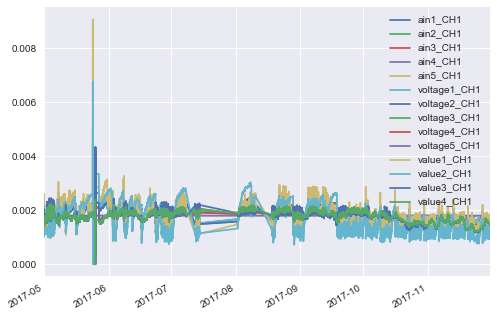

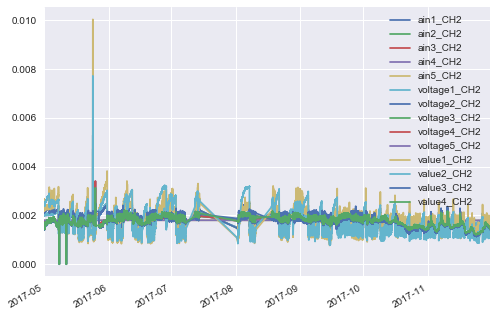

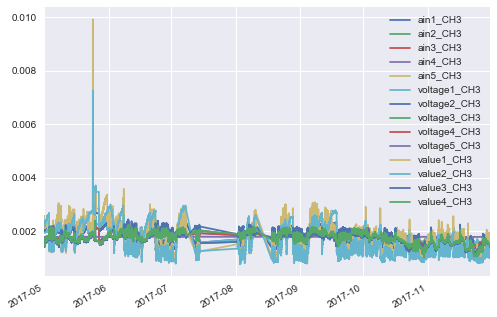

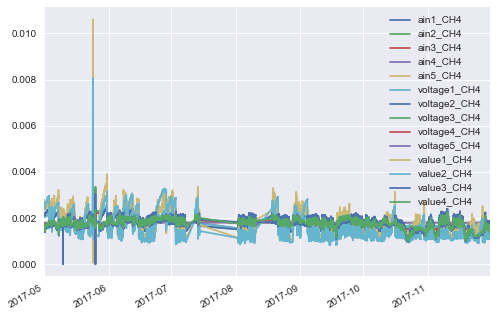

In [154]:
_11 = NPeriodTemp1.plot()
_12 = NPeriodTemp2.plot()
_13 = NPeriodTemp3.plot()
_14 = NPeriodTemp4.plot()

In [155]:
weekly_summary = pd.DataFrame()
weekly_summary['value1_CH3'] = NPeriodTemp3.value1_CH3.resample('W').mean()
weekly_summary['value2_CH3'] = NPeriodTemp3.value2_CH3.resample('W').mean()
weekly_summary['value3_CH3'] = NPeriodTemp3.value3_CH3.resample('W').mean()
weekly_summary['value4_CH3'] = NPeriodTemp3.value4_CH3.resample('W').mean()
weekly_summary.head()

,value1_CH3,value2_CH3,value3_CH3,value4_CH3
2017-05-07,0.002079,0.001997,0.001699,0.001727
2017-05-14,0.002195,0.001961,0.001754,0.001787
2017-05-21,0.002160,0.002163,0.001670,0.001708
2017-05-28,0.002447,0.002792,0.001712,0.001745
2017-06-04,0.002495,0.002461,0.001781,0.001803


In [165]:
#minutes_summary = df.groupby(pd.TimeGrouper(freq='10Min')).aggregate(numpy.sum)
#agg_10m = df.groupby(pd.Grouper(freq='10Min')).aggregate(numpy.sum)

#times = pd.to_datetime(NPeriodTemp3.timestamp_col)
times = NPeriodTemp3.index
NPeriodTemp3Min = NPeriodTemp3.groupby([times.hour, times.minute]).sum()
NPeriodTemp3Min.head()
#df.groupby([times.dt.hour, times.dt.minute])

ain1_CH3  ain2_CH3  ain3_CH3  ain4_CH3  ain5_CH3  voltage1_CH3  \
0 0  0.330049  0.321073  0.324783  0.326889  0.331331      0.330049   
  1  0.330128  0.320855  0.324644  0.326787  0.331337      0.330128   
  2  0.329997  0.320839  0.324550  0.326717  0.331340      0.329997   
  3  0.330058  0.320719  0.324373  0.326699  0.331343      0.330058   
  4  0.330059  0.320537  0.324261  0.326585  0.331346      0.330059   

     voltage2_CH3  voltage3_CH3  voltage4_CH3  voltage5_CH3  value1_CH3  \
0 0      0.321073      0.324783      0.326889      0.331331    0.320998   
  1      0.320855      0.324644      0.326787      0.331337    0.321185   
  2      0.320839      0.324550      0.326717      0.331340    0.320874   
  3      0.320719      0.324373      0.326699      0.331343    0.321020   
  4      0.320537      0.324261      0.326585      0.331346    0.321021   

     value2_CH3  value3_CH3  value4_CH3  
0 0    0.299940    0.319632    0.322982  
  1    0.299510    0.319410    0.322817  
  2    0.299478    0.319259    0.322704  
  3    0.299241    0.318976    0.322675  
  4    0.298882    0.318797    0.322491

In [168]:
total_rows = NPeriodTemp3Min.count
print(total_rows)

<bound method DataFrame.count of        ain1_CH3  ain2_CH3  ain3_CH3  ain4_CH3  ain5_CH3  voltage1_CH3  \
0  0   0.330049  0.321073  0.324783  0.326889  0.331331      0.330049   
   1   0.330128  0.320855  0.324644  0.326787  0.331337      0.330128   
   2   0.329997  0.320839  0.324550  0.326717  0.331340      0.329997   
   3   0.330058  0.320719  0.324373  0.326699  0.331343      0.330058   
   4   0.330059  0.320537  0.324261  0.326585  0.331346      0.330059   
   5   0.329838  0.320539  0.324205  0.326569  0.331331      0.329838   
   6   0.329975  0.320518  0.324247  0.326554  0.331315      0.329975   
   7   0.329757  0.320493  0.324202  0.326502  0.331337      0.329757   
   8   0.329931  0.320447  0.324209  0.326431  0.331312      0.329931   
   9   0.330043  0.320496  0.324103  0.326358  0.331309      0.330043   
   10  0.330141  0.320492  0.324097  0.326312  0.331334      0.330141   
   11  0.329895  0.320423  0.324083  0.326278  0.331318      0.329895   
   12  0.329951  0

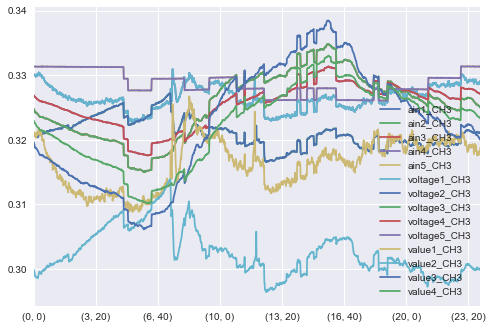

In [160]:
_3min = NPeriodTemp3Min.plot()

# Feature Selection Code

In [71]:
Y = AugDataWindowDropNorm["error?"].values
X2 = AugDataWindowDropNorm.drop(["error?"],axis=1)
X = X2.as_matrix()
colnames = X2.columns
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
#def ranking(ranks, names, order=1):
#    minmax = MinMaxScaler()
#    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#    ranks = map(lambda x: round(x,2), ranks)
#    return dict(zip(names, ranks))

In [72]:
from sklearn.feature_selection import (RFE,RFECV)
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.svm import (SVR,LinearSVR)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# Using Random Forest
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

#Run Default Correlation Function
ranks["Corr"] = AugDataWindowDropNorm.corr()["error?"]
#for i in colnames:
#    ranks["Corr"][i] = round(ranks["Corr"][i], 4)

# Construct our Linear Regression model and rank features using Recursive Feature Elimination
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

#rfe2 using Support Vector Regression and RFE
svr = LinearSVR()
rfe2 = RFE(estimator=svr, n_features_to_select=1, step=1)
rfe2.fit(X, Y )
ranks["RFE2"] = ranking(list(map(float, rfe2.ranking_)), colnames, order=-1)

# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=10, aspect=1.9, palette='coolwarm')

building tree 2 of 50building tree 1 of 50building tree 3 of 50building tree 4 of 50



building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.1min finished


NameError: name 'ranking' is not defined

In [ ]:
numfeatures = len(colnames)
print(ranks["Mean"])
def dropfeatures(data,colnames,threshold):
    for i in colnames:
        if ranks["Mean"][i] <= threshold:
            print(i+" dropped")
            data = data.drop([i],axis=1)
    return data
shifted_returns = dropfeatures(shifted_returns,colnames,0.2)
shifted_returns.describe()

In [ ]:
print("test")

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
# https://blog.keras.io/building-autoencoders-in-keras.html
inputs = Input(shape=(401,))
encoded = Dense(184, activation='tanh')(inputs)
encoded = Dense(92, activation='tanh')(encoded)
encoded = Dense(46, activation='tanh')(encoded)

decoded = Dense(92, activation='tanh')(encoded)
decoded = Dense(184, activation='tanh')(decoded)
outputs = Dense(401, activation='sigmoid')(decoded)

model = Model(input=inputs, output=outputs)
adamOp = keras.optimizers.Adam(lr=0.008)
model.compile(optimizer= adamOp, loss='mse')
history = model.fit(train_set, train_set, batch_size=64, nb_epoch=10)

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

"""
original encoder from "Many Flavors of AE
https://wiseodd.github.io/techblog/2016/12/03/autoencoders/
"""

In [ ]:
results = final_sampled_data #pd.DataFrame(model.predict(train_set), columns = final_sampled_data.columns, index=final_sampled_data.index)

In [ ]:
label_data = results.iloc[:,:1] # get the first x cols, which are the errors
training_data = results.iloc[:,1:] # get predictor features

In [ ]:
#Check label data as correctly predicted
label_data = results.iloc[:,:1]
label_data[label_data['error?'] > 0]
label_data.describe()

# Creating the Neural Network

In [ ]:
"""
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(200, input_dim=400, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
    
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=10, batch_size=5, verbose=0)
results = cross_val_score(estimator, training_data, label_data)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#results = pd.DataFrame(model.predict(train_set), columns = final_sampled_data.columns, index=final_sampled_data.index)
#label_data = results.iloc[:,:1] # get the first x cols, which are the errors
#label_data[label_data['error?'] == 0]
"""

In [ ]:
y_train = label_data
y_test = test_set.iloc[:,:1]
x_train = training_data
x_test = test_set.iloc[:,1:]

In [ ]:
import sklearn.metrics

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

predicted = model.predict(x_test)
predicted = (predicted > 0.5)

In [ ]:
results = sklearn.metrics.confusion_matrix(y_test, predicted)

In [ ]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, predicted).ravel()
(tn, fp, fn, tp)

In [ ]:
predicted

In [ ]:
test_set[predicted].plot()

for ts in list(error3_Aug_occ):
    plt.axvline(ts, color='purple')
    
plt.legend(prop={'size': 40})
plt.show()

In [ ]:
results

In [ ]:
error3_Aug_pred = pd.DataFrame(predicted, index = test_set.index)

In [ ]:
error3_Aug_pred['actual_error'] = test_set['error?']

In [ ]:
error3_Aug_pred.iloc[38802]

In [ ]:
error3_Aug_pred['actual_error'].nonzero()

In [ ]:
#examine the lag between actual and predicted errors
error3_Aug_pred.iloc[38500:39000].plot(figsize=[50,20], fontsize = 50)

#for ts in list(error3_Aug_occ):
    #plt.axvline(ts, color='purple')

plt.legend(prop={'size': 40})
plt.show()

# (OLD) Predict October data for Chiller 3

In [ ]:
power3 = power_data[power_data['chiller'] == 3]
temp3 = temp_data[temp_data['chiller'] == 3]
evaflow3 = evaflow_data[evaflow_data['chiller'] == 3]
conflow3 = conflow_data[conflow_data['chiller'] == 3]

power3_Aug = power3[pd.DatetimeIndex(power3.index).month == 10]
temp3_Aug = temp3[pd.DatetimeIndex(temp3.index).month == 10]
evaflow3_Aug = evaflow3[pd.DatetimeIndex(evaflow3.index).month == 10]
conflow3_Aug = conflow3[pd.DatetimeIndex(conflow3.index).month == 10]
zonepump_Aug = zonepump_data[pd.DatetimeIndex(zonepump_data.index).month == 10]

In [ ]:
error_Aug = pd.read_csv("data_errorlog/Equipment Error Log_2017-10-01_2017-10-31.csv")
error3_Aug = error_Aug[error_Aug['Equipment ID'] == 'ch3']
error3_Aug['Start'] = pd.to_datetime(error3_Aug['Start'])
error3_Aug = error3_Aug.set_index('Start')

In [ ]:
# round down timestamps to nearest min
power3_Aug_cleaned = power3_Aug.set_index(
                        pd.to_datetime(power3_Aug.index).floor('min'))

# remove instances with duplicated index
power3_Aug_cleaned = power3_Aug_cleaned[
                        [not d for d in power3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
power3_Aug_cleaned = power3_Aug_cleaned.reindex(
                        pd.date_range(
                            power3_Aug_cleaned.index[0].date(),
                            power3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='ffill')
power3_Aug_cleaned = power3_Aug_cleaned.fillna(method='bfill')

In [ ]:
# round down timestamps to nearest min
temp3_Aug_cleaned = temp3_Aug.set_index(
                        pd.to_datetime(temp3_Aug.index).floor('min'))

# remove instances with duplicated index
temp3_Aug_cleaned = temp3_Aug_cleaned[
                        [not d for d in temp3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
temp3_Aug_cleaned = temp3_Aug_cleaned.reindex(
                        pd.date_range(
                            temp3_Aug_cleaned.index[0].date(),
                            temp3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='ffill')
temp3_Aug_cleaned = temp3_Aug_cleaned.fillna(method='bfill')

In [ ]:
# round down timestamps to nearest min
evaflow3_Aug_cleaned = evaflow3_Aug.set_index(
                        pd.to_datetime(evaflow3_Aug.index).floor('min'))

# remove instances with duplicated index
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned[
                        [not d for d in evaflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            evaflow3_Aug_cleaned.index[0].date(),
                            evaflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='ffill')
evaflow3_Aug_cleaned = evaflow3_Aug_cleaned.fillna(method='bfill')

In [ ]:
# round down timestamps to nearest min
conflow3_Aug_cleaned = conflow3_Aug.set_index(
                        pd.to_datetime(conflow3_Aug.index).floor('min'))

# remove instances with duplicated index
conflow3_Aug_cleaned = conflow3_Aug_cleaned[
                        [not d for d in conflow3_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
conflow3_Aug_cleaned = conflow3_Aug_cleaned.reindex(
                        pd.date_range(
                            conflow3_Aug_cleaned.index[0].date(),
                            conflow3_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='ffill')
conflow3_Aug_cleaned = conflow3_Aug_cleaned.fillna(method='bfill')

In [ ]:
# round down timestamps to nearest min
zonepump_Aug_cleaned = zonepump_Aug.set_index(
                        pd.to_datetime(zonepump_Aug.index).floor('min'))

# remove instances with duplicated index
zonepump_Aug_cleaned = zonepump_Aug_cleaned[
                        [not d for d in zonepump_Aug_cleaned.index.duplicated()]]

# set the index to every minute mark
zonepump_Aug_cleaned = zonepump_Aug_cleaned.reindex(
                        pd.date_range(
                            zonepump_Aug_cleaned.index[0].date(),
                            zonepump_Aug_cleaned.index[-1].date() + dt.timedelta(days=1),
                            freq='min'))

# forward and backward fill any newly created rows
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='ffill')
zonepump_Aug_cleaned = zonepump_Aug_cleaned.fillna(method='bfill')

### Process error log data

In [ ]:
# create boolean columns that indicate presence/absence of error at each timestamp
bin_Aug_Error = pd.get_dummies(error3_Aug['Error Type'])

# round down timestamps to nearest min
bin_Aug_Error = bin_Aug_Error.set_index(
                        pd.to_datetime(bin_Aug_Error.index).floor('min'))

# merge rows having the same timestamp, by summing their values in each column
bin_Aug_Error = bin_Aug_Error.groupby(by=bin_Aug_Error.index).sum()

# expand the error occurrences to include timestamps from time t-5 to time t
expanded_Aug_Error = pd.DataFrame(columns=bin_Aug_Error.columns)
for i in range(len(bin_Aug_Error)):
    curr_data = bin_Aug_Error.iloc[i]
    curr_timestamp = curr_data.name
    for j in range(6):
        curr_data.rename(curr_timestamp - pd.Timedelta(minutes=j), inplace=True)
        expanded_Aug_Error = expanded_Aug_Error.append(curr_data)

# merge rows having the same timestamp, by summing their values in each column
expanded_Aug_Error = expanded_Aug_Error.groupby(by=expanded_Aug_Error.index).sum()

# set index to every minute mark
expanded_Aug_Error = expanded_Aug_Error.reindex(
                        pd.date_range(
                            "2017-10-01 00:00:00",
                            "2017-10-31 23:59:00",
                            freq='min'))

# fill any newly created rows with 0
expanded_Aug_Error = expanded_Aug_Error.fillna(value = 0)

# assign back to the original name so that the rest of the code works
bin_Aug_Error = expanded_Aug_Error

_ = bin_Aug_Error.plot()

### Compile shortlisted data features into one dataframe

In [ ]:
shortlisted_features = pd.DataFrame()

shortlisted_features['pm_ch1Watt'] = power3_Aug_cleaned['ch1Watt']
shortlisted_features['pm_ch2Watt'] = power3_Aug_cleaned['ch2Watt']
shortlisted_features['pm_ch3Watt'] = power3_Aug_cleaned['ch3Watt']
shortlisted_features['pm_totalPositiveWattHour'] = power3_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['zp_ch1Watt'] = zonepump_Aug_cleaned['ch1Watt']
shortlisted_features['zp_ch2Watt'] = zonepump_Aug_cleaned['ch2Watt']
shortlisted_features['zp_ch3Watt'] = zonepump_Aug_cleaned['ch3Watt']
shortlisted_features['zp_totalPositiveWattHour'] = zonepump_Aug_cleaned['totalPositiveWattHour']

shortlisted_features['evaflow_flowRate'] = evaflow3_Aug_cleaned['flowRate']
shortlisted_features['evaflow_flowSpeed'] = evaflow3_Aug_cleaned['flowSpeed']
shortlisted_features['evaflow_totalFlowRate'] = evaflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['conflow_flowRate'] = conflow3_Aug_cleaned['flowRate']
shortlisted_features['conflow_flowSpeed'] = conflow3_Aug_cleaned['flowSpeed']
shortlisted_features['conflow_totalFlowRate'] = conflow3_Aug_cleaned['totalFlowRate']

shortlisted_features['chilled_supply'] = temp3_Aug_cleaned['value1']
shortlisted_features['chilled_return'] = temp3_Aug_cleaned['value2']
shortlisted_features['cooling_supply'] = temp3_Aug_cleaned['value3']
shortlisted_features['cooling_return'] = temp3_Aug_cleaned['value4']

shortlisted_features.describe()

### Calculate Heat Capacity Rate (kW)

In [ ]:
# water density obtained according to example in slides (units: kg/cubicmetre)
# evaflow converted from litre-per-min to cubicmetre-per-hr
hcr = \
(999.68844162593 \
* shortlisted_features['evaflow_totalFlowRate'] * 0.06 \
* 4.19 \
* (shortlisted_features['chilled_return'] - shortlisted_features['chilled_supply'])) \
/ 3600

shortlisted_features['hcr'] = hcr

hcr.describe()

### Calculate Coefficient of Performance (kW)

In [ ]:
cop = hcr/(shortlisted_features['pm_totalPositiveWattHour']/1000)

shortlisted_features['cop'] = cop

cop.describe()

In [ ]:
shortlisted_features = perform_windowing(shortlisted_features,20,1)

In [ ]:
x = shortlisted_features

In [ ]:
y = binary_maker(bin_Aug_Error.sum(axis=1))
# combined_label_data['error?'] = y
y[y > 0]

In [ ]:
x = shortlisted_features.loc['2017-10-03 08:21:00':'2017-10-03 08:26:00']
y = y.loc['2017-10-03 08:21:00':'2017-10-03 08:26:00']
y

In [ ]:
score = model.evaluate(x, y, batch_size=48)
score

In [ ]:
model.predict(x, batch_size=None, verbose=0)